In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from IPython.display import display
import pandas as pd

plt.style.use('ggplot')
tf.random.set_seed(1)

2024-02-07 20:47:47.694146: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 20:47:47.760530: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-07 20:47:47.760618: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-07 20:47:47.762820: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-07 20:47:47.773981: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 20:47:47.774394: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [3]:
def normalize_img(img, label):
    return tf.cast(img, tf.float32) / 255.0, label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

TensorShape([28, 28, 1])

<tf.Tensor: shape=(), dtype=int64, numpy=6>

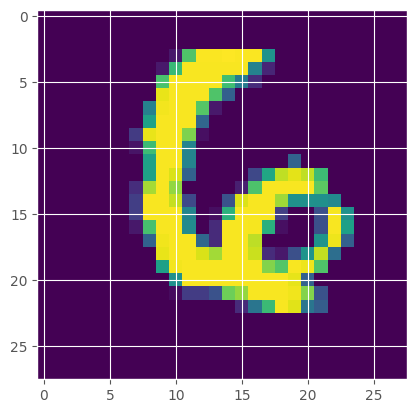

TensorShape([28, 28, 1])

<tf.Tensor: shape=(), dtype=int64, numpy=2>

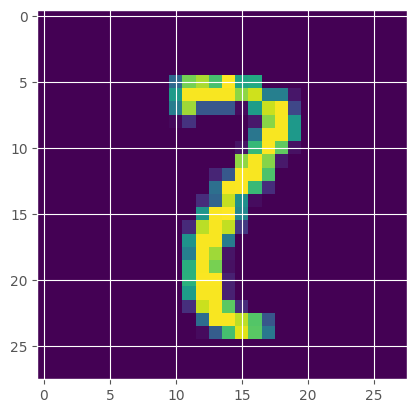

TensorShape([28, 28, 1])

<tf.Tensor: shape=(), dtype=int64, numpy=1>

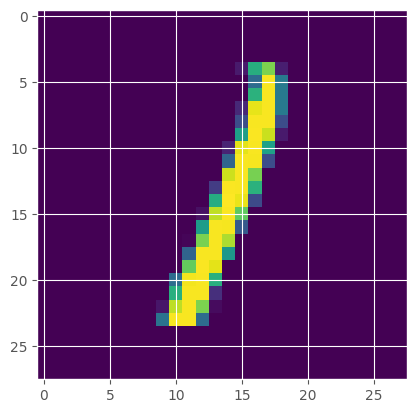

In [4]:
for img, label in ds_train.unbatch().take(3):
    display(img.shape)
    display(label)
    plt.imshow(img)
    plt.show()

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='linear')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

train_res = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
    callbacks=[
    ]
)

Epoch 1/10
469/469 [==============================] - 4s 5ms/step - loss: 0.3765 - sparse_categorical_accuracy: 0.8930 - val_loss: 0.1868 - val_sparse_categorical_accuracy: 0.9456
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1746 - sparse_categorical_accuracy: 0.9493 - val_loss: 0.1367 - val_sparse_categorical_accuracy: 0.9620
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1282 - sparse_categorical_accuracy: 0.9626 - val_loss: 0.1088 - val_sparse_categorical_accuracy: 0.9674
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1024 - sparse_categorical_accuracy: 0.9705 - val_loss: 0.0971 - val_sparse_categorical_accuracy: 0.9704
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0853 - sparse_categorical_accuracy: 0.9744 - val_loss: 0.0833 - val_sparse_categorical_accuracy: 0.9739
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0739 - sparse_categorica

<Axes: >

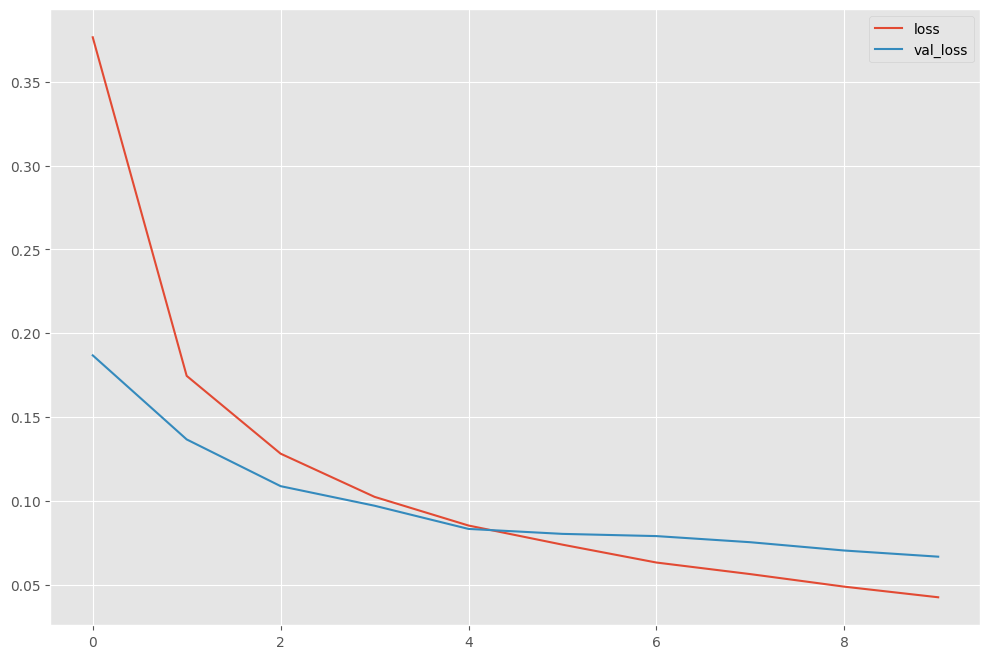

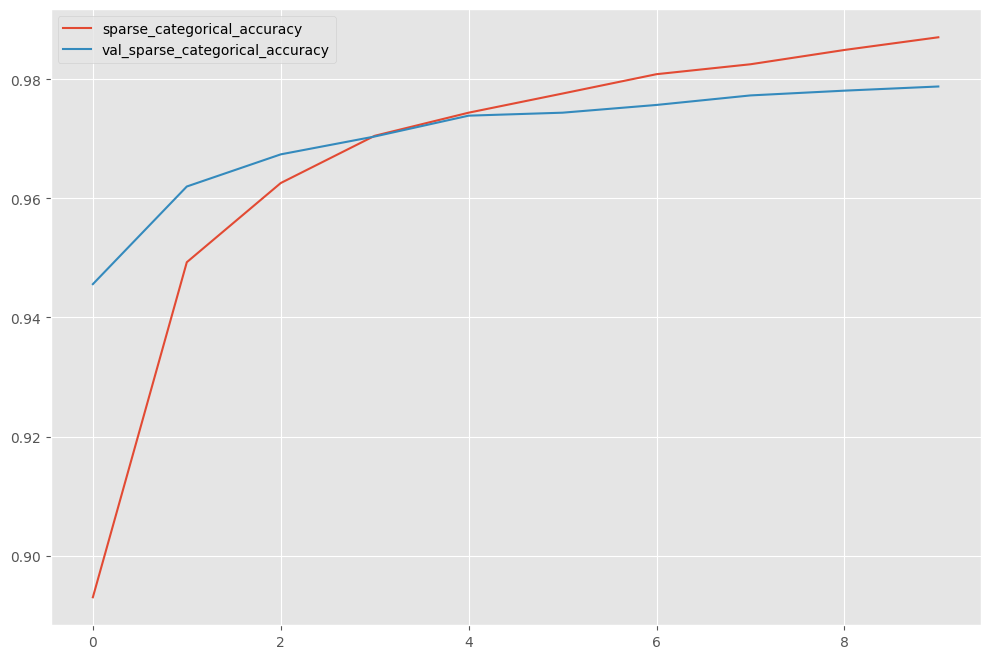

In [7]:
df = pd.DataFrame(train_res.history)
df[['loss', 'val_loss']].plot(figsize=(12,8))
df[['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot(figsize=(12, 8))